<a href="https://colab.research.google.com/github/sophiasarica/my_first_repo/blob/main/Sophia_VEHICLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data601 Final Project <a id="4"></a>



**DataSets**
*   Vehicle Details
*   Vehicle Crashes 



**Importing  'Vehichle Details' DataSet**




In [1]:
# import pyplot interface of matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
import pandas as pd

## read_csv file 
#df = pd.read_csv("/content/mhft-5t5y.csv")
df = pd.read_csv('https://opendata.maryland.gov/resource/mhft-5t5y.csv?$limit=800000', low_memory=False)

#df.head()

In [3]:
df.head()

,harm_event_desc,harm_event_code,conti_direction_desc,conti_direction_code,damage_desc,damage_code,movement_desc,movement_code,vin_no,report_no,cv_body_type_desc,cv_body_type_code,veh_year,veh_make,veh_model,commercial_flag_desc,commercial_flag,hzm_num,towed_away_flag_desc,towed_away_flag,num_axles,gvw_desc,gvw_code,going_direction_desc,going_direction_code,body_type_desc,body_type_code,driverless_flag_desc,driverless_flag,fire_flag_desc,fire_flag,parked_flag_desc,parked_flag,speed_limit,hit_and_run_flag_desc,hit_and_run_flag,hazmat_spill_flag_desc,hazmat_spill_flag,vehicle_id,towed_vehicle_config_desc,towed_vehicle_config_code,area_damaged_code_imp1,area_damaged_code1,area_damaged_code2,area_damaged_code3,area_damaged_code_main_desc,area_damaged_code_main,year,quarter
0,Other Vehicle,1.0,North,N,Unknown,99,Unknown,99.0,NaN,AE5057004X,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,North,N,NaN,NaN,NaN,U,No,N,No,N,25,Yes,Y,NaN,NaN,47e2531d-8c69-470c-9198-502a46c7639e,Unknown,99,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2
1,Other Vehicle,1.0,North,N,Superficial,2,Moving Constant Speed,1.0,NMTKHMBX0JR025092,MSP7221001P,NaN,NaN,2018.0,TOYOTA,CAMRY,No,N,NaN,No,N,NaN,NaN,NaN,North,N,Passenger Car,2.00,No,N,No,N,No,N,55,No,N,NaN,NaN,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,Not Applicable,0,12.0,6.0,12.0,NaN,Twelve o'clock,12.0,2020,Q2
2,Other Vehicle,1.0,South,S,Functional,3,Stopped in Traffic Lane,6.0,2GNAXPEX5K6103012,DA37010040,NaN,NaN,2019.0,CHEVROLET,EQUINOX,No,N,NaN,No,N,NaN,NaN,NaN,South,S,(Sport) Utility Vehicle,23.08,No,N,No,N,No,N,30,No,N,NaN,NaN,f2c0d05c-ff70-4549-9d48-57c182eae6f2,Not Applicable,0,6.0,6.0,NaN,NaN,Six o'clock,6.0,2020,Q2
3,Fixed Object,9.0,Unknown,U,Unknown,99,Not Applicable,0.0,NaN,MDTA1791002C,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,Unknown,U,NaN,NaN,No,N,No,N,No,N,35,Yes,Y,NaN,NaN,5a55c4ee-17e9-4eed-bfe9-f5aca18f5b9e,Not Applicable,0,99.0,99.0,NaN,NaN,Unknown,99.0,2020,Q2
4,Other Vehicle,1.0,East,E,Disabling,4,Slowing or Stopping,3.0,5FNRL18672B048550,AE456100BL,NaN,NaN,2002.0,HONDA,VAN,No,N,NaN,Yes,Y,NaN,NaN,NaN,East,E,Passenger Car,2.00,No,N,No,N,No,N,35,No,N,NaN,NaN,23d968b0-be0e-4810-b6f0-34ef33fd7112,Not Applicable,0,6.0,6.0,12.0,NaN,Six o'clock,6.0,2020,Q2


In [4]:
pd.set_option('display.max_rows', 9999)


In [5]:
df['veh_make'][:50]

0        UNKNOWN
1         TOYOTA
2      CHEVROLET
3        UNKNOWN
4          HONDA
5           FORD
6           HOND
7          VOLVO
8          HONDA
9           MAZD
10      NEWFLYER
11          TOYT
12         MAZDA
13    MITSUBISHI
14         HONDA
15        TOYOTA
16        NISSAN
17          FORD
18           KIA
19         CHEVY
20          SUZI
21          FORD
22          FORD
23       UNKNOWN
24          PIRC
25    VOLKSWAGON
26         HONDA
27        TOYOTA
28        NISSAN
29        TOYOTA
30        YAMAHA
31       HYUNDAI
32     CHEVROLET
33         CHEVY
34        TOYOTA
35          MERZ
36        NISSAN
37       HYUNDAI
38        NISSAN
39          CADI
40     CHEVROLET
41         HONDA
42          PTRB
43          HOND
44          ACUR
45        SUBARU
46         DODGE
47          JEEP
48         BUICK
49          CADI
Name: veh_make, dtype: object

In [ ]:
#df.columns

# Exploring Datasets <a id="0"></a>


In [6]:
makes = {"ACURA",
 "ALLIS CHALMERS",
 "ALPHA ROMEO",
 "AMC",
 "AUDI",
 "BMW",
 "BRIGGS & STRATTON",
 "BUICK",
 "CADILLAC",
 "CATERPILLAR",
 "CHEVROLET",
 "CHRYSLER",
 "CONTINENTAL",
 "CUMMINS",
 "DETROIT DIESEL",
 "DEUTZ",
 "DODGE",
 "FIAT",
 "FORD",
 "GEO",
 "GMC",
 "HENSHEL",
 "HERCULES",
 "HINO",
 "HONDA",
 "HUNMER",
 "HYUNDAI",
 "INFINITY",
 "INTERNATIONAL",
 "ISUZU",
 "IVECO-FIAT",
 "JAGUAR",
 "JEEP",
 "JOHN DEERE",
 "KIA",
 "KOHLER",
 "KOMATSU",
 "KUBOTA",
 "LAND ROVER",
 "LEXUS",
 "LINCOLN",
 "LISTER PETTER",
 "MACK",
 "MAZDA",
 "MERCEDES",
 "MERCURY",
 "MINI COOPER",
 "MITSUBISHI",
 "NISSAN",
 "OLDSMOBILE",
 "ONAN",
 "PERKINS",
 "PEUGEOT",
 "PLYMOUTH",
 "PONTIAC",
 "PORSCHE",
 "RENAULT",
 "SAAB",
 "SATURN",
 "SCANIA",
 "SCION",
 "SUBARU",
 "SUZUKI",
 "TESLA",
 "TOYOTA",
 "VOLKSWAGEN",
 "VOLVO",
 "WISCONSIN",
 "YANMER-MARINE"}

In [7]:
# https://stackoverflow.com/questions/17388213/find-the-similarity-metric-between-two-strings
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a.upper(), b.upper()).ratio()

# similar('volk1', 'VOLKSWAGEN')

In [8]:
# https://stackoverflow.com/questions/7331462/check-if-a-string-is-a-possible-abbrevation-for-a-name
import re    
def is_abbrev(abbrev, text):
    try:
      pattern = ".*".join(abbrev.upper())
      return re.match("^" + pattern, text.upper()) is not None
    except:
      print(abbrev, text)
      raise Exception('error')

# is_abbrev('inf', 'INFINITI')

In [9]:
import re
def clean_string(word):
  return re.sub('[^A-Za-z0-9]+', '', word).upper()

#clean_string('JEE[')

In [10]:
def get_correct_make(value):
  if type(value) != str:
    return None

  value = clean_string(value)
  if value in makes:
    return value

  for make in makes:
    if is_abbrev(value, make) == True:
      return make

  for make in makes:
    if similar(value, make) >= 0.6 :
      return make

  return None

# get_correct_make('tyt')

In [11]:
corrections = {
    'CHEVY': 'CHEVROLET'
}

for make in set(df['veh_make']):
  correct_brand = get_correct_make(make)
  corrections[make] = correct_brand

In [ ]:
 #corrections

In [12]:
def get_correct_value(value):
  if value not in corrections:
    return None
  # print(value, type(value))
  return corrections[value]

In [13]:
df['VEH_MAKE_CLEAN'] = [ get_correct_value(x) for x in df['veh_make']]

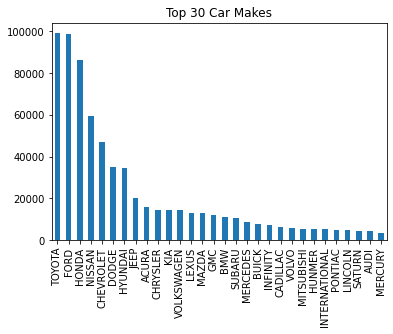

In [14]:

df['VEH_MAKE_CLEAN'].value_counts()[:30].plot(kind='bar')
plt.title('Top 30 Car Makes')
plt.show()

In [15]:
df[df['VEH_MAKE_CLEAN']=='Unknown'][[ 'veh_make']].value_counts()

Series([], dtype: int64)

In [16]:
df['VEH_MAKE_CLEAN'].value_counts()

TOYOTA               99155
FORD                 98766
HONDA                86176
NISSAN               59387
CHEVROLET            47028
DODGE                35122
HYUNDAI              34594
JEEP                 20211
ACURA                15696
CHRYSLER             14308
KIA                  14286
VOLKSWAGEN           14283
LEXUS                13001
MAZDA                12889
GMC                  12218
BMW                  11229
SUBARU               10575
MERCEDES              8609
BUICK                 7601
INFINITY              7224
CADILLAC              6085
VOLVO                 5666
MITSUBISHI            5440
HUNMER                5284
INTERNATIONAL         5188
PONTIAC               5069
LINCOLN               4773
SATURN                4400
AUDI                  4260
MERCURY               3247
SCION                 1933
MACK                  1913
SUZUKI                1902
AMC                   1698
ISUZU                 1404
KOMATSU               1284
LAND ROVER            1266
M

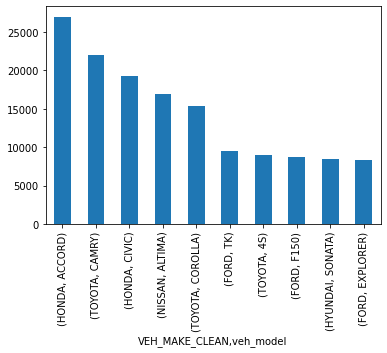

In [17]:
df[['VEH_MAKE_CLEAN','veh_model']].value_counts()[:10].plot(kind='bar')


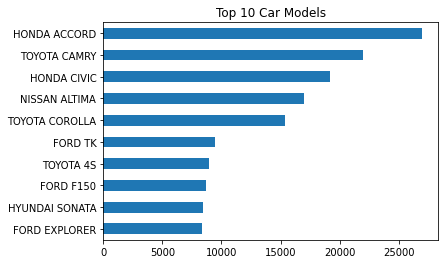

In [18]:
ax = (df['VEH_MAKE_CLEAN'] + ' ' + df['veh_model']).value_counts()[:10].plot(kind='barh' )
ax.invert_yaxis()
plt.title('Top 10 Car Models')
plt.show()


In [19]:
#pd.options.display.max_rows


In [20]:
df[['veh_year']].value_counts()


veh_year
2015.0      53415
2014.0      49491
2013.0      48377
2016.0      43761
2012.0      43586
2007.0      40477
2006.0      38899
2008.0      38875
2011.0      38183
2005.0      36172
2010.0      34793
2004.0      34038
2017.0      31929
2003.0      30419
2009.0      29339
2002.0      25092
2018.0      20729
2001.0      20595
2000.0      19815
1999.0      13526
2019.0      12419
1998.0      10229
0.0          9588
1997.0       8006
1996.0       5367
1995.0       4458
2020.0       3779
1994.0       3311
1993.0       1996
1992.0       1480
1991.0       1207
1990.0        985
1900.0        873
1989.0        795
1988.0        622
9999.0        476
1987.0        464
99.0          395
1986.0        316
1985.0        274
1984.0        187
1901.0        118
1983.0        105
2021.0        102
7.0            91
8.0            84
1982.0         79
1.0            78
1980.0         70
6.0            65
1979.0         64
5.0            63
1981.0         63
3.0            63
4.0            62
1

In [21]:
df_year = df['veh_year']
df_year.dropna(inplace=True)
df_year = df_year.astype(int)

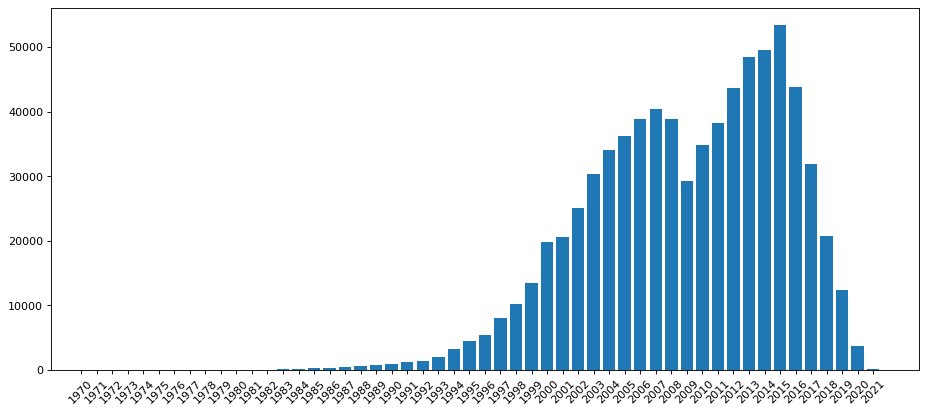

In [22]:
plt.figure(figsize=(14, 6), dpi=80)

df_year_counts = df_year[(df_year > 1970) & (df_year < 2022)].value_counts()
df_year_counts.sort_index(inplace=True)
# df_year_counts.plot()
plt.bar(df_year_counts.index, df_year_counts)
plt.xticks(list(range(1970, 2022)), rotation=45)
plt.show()

In [23]:
crashes = pd.read_csv('https://opendata.maryland.gov/resource/65du-s3qu.csv?$limit=800000', low_memory=False)


In [24]:
df.columns

Index(['harm_event_desc', 'harm_event_code', 'conti_direction_desc',
       'conti_direction_code', 'damage_desc', 'damage_code', 'movement_desc',
       'movement_code', 'vin_no', 'report_no', 'cv_body_type_desc',
       'cv_body_type_code', 'veh_year', 'veh_make', 'veh_model',
       'commercial_flag_desc', 'commercial_flag', 'hzm_num',
       'towed_away_flag_desc', 'towed_away_flag', 'num_axles', 'gvw_desc',
       'gvw_code', 'going_direction_desc', 'going_direction_code',
       'body_type_desc', 'body_type_code', 'driverless_flag_desc',
       'driverless_flag', 'fire_flag_desc', 'fire_flag', 'parked_flag_desc',
       'parked_flag', 'speed_limit', 'hit_and_run_flag_desc',
       'hit_and_run_flag', 'hazmat_spill_flag_desc', 'hazmat_spill_flag',
       'vehicle_id', 'towed_vehicle_config_desc', 'towed_vehicle_config_code',
       'area_damaged_code_imp1', 'area_damaged_code1', 'area_damaged_code2',
       'area_damaged_code3', 'area_damaged_code_main_desc',
       'area_damaged_

In [25]:
df_merged = crashes.merge(df, on='report_no', how='left')

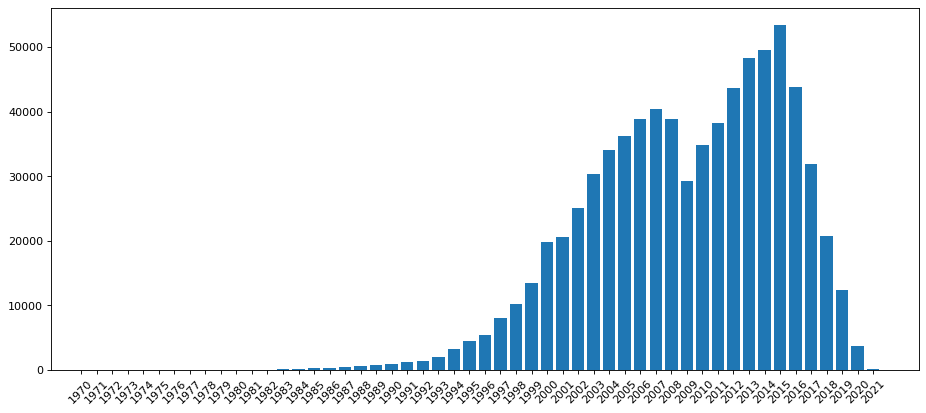

In [26]:
df_year = df_merged['veh_year']
df_year.dropna(inplace=True)
df_year = df_year.astype(int)

plt.figure(figsize=(14, 6), dpi=80)

df_year_counts = df_year[(df_year > 1970) & (df_year < 2022)].value_counts()
df_year_counts.sort_index(inplace=True)
# df_year_counts.plot()
plt.bar(df_year_counts.index, df_year_counts)
plt.xticks(list(range(1970, 2022)), rotation=45)
plt.show()

<Figure size 1120x480 with 0 Axes>

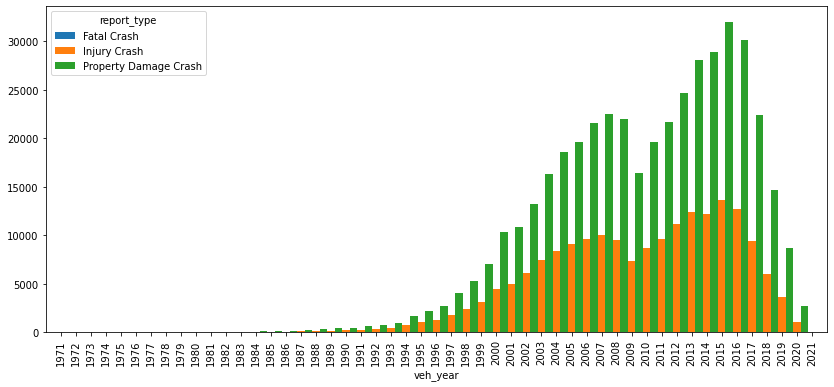

In [27]:
plt.figure(figsize=(14, 6), dpi=80)

df_year_rt = df_merged[['veh_year', 'report_type']][(df_merged['veh_year'] > 1970) & (df_merged['veh_year'] < 2022)]
df_year_rt.dropna(inplace=True)
df_year_rt['veh_year'] = df_year_rt['veh_year'] .astype(int)

df_year_rt.groupby(['report_type', 'veh_year']).size().unstack(level=0).plot(kind='bar', figsize=(14, 6), width=1.5)
plt.show()